In [2]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loan Data Set


In [3]:
#reading the data
df = pd.read_csv("loan.csv")

df.describe()
df.shape


(39717, 111)

### Loan Data Set
- checking for null values


In [4]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## Since there are a lot of columns with null values. Let's remove them first

In [5]:
df.dropna(axis = 1, inplace = True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0


In [6]:
df.isnull().sum()


id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int 


## There are several columns which are having only one value. Didn't see them contibuting to our analysis. So removing them.


In [7]:

df.drop(['pymnt_plan', "initial_list_status",'policy_code','acc_now_delinq', 'application_type', 'delinq_amnt'], axis = 1, inplace = True)


In [8]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79


### Now we have 37 columns out of which some correspond to the post approval of loan
- We now want analyze the user details and the driving factors of loan defaulting before approving loan.
- So we can safely remove the columns that do not cotribute to that scenario.
- Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state". 
- These columns doesnt contribute to the loan defaulting as they have irrelevant information. So removing them as well. 
- "desc" has description which we cannot use as well for now,removing it.
- "out_prncp_inv" , "total_pymnt_inv " are not contributing to the loan defaulting as well. So removing them too. 
- "funded_amnt" is not needed as well, we need info on how much is funded in actual. we have "funded_amnt_inv" , we can remove "funded_amnt".

### List of post-approval features
- delinq_2yrs
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record

In [9]:

df.drop(["id", "member_id", "url", "zip_code", "addr_state","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_amnt"], axis = 1, inplace = True) 
df.head()


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,0,15,0,38


In [10]:
df.shape

(39717, 19)

### The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
- We cannot make anything up for the current loans. 
- To exclude that data , removing the records with current loan status

In [11]:
df = df[df.loan_status != "Current"]
df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [12]:
df.isna().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
total_acc              0
dtype: int64

In [13]:
#removing % symbol from int_rate column to make it more meaningfull
df.int_rate=pd.to_numeric(df.int_rate.apply(lambda x : x.split('%')[0]))

### Looking for outliers

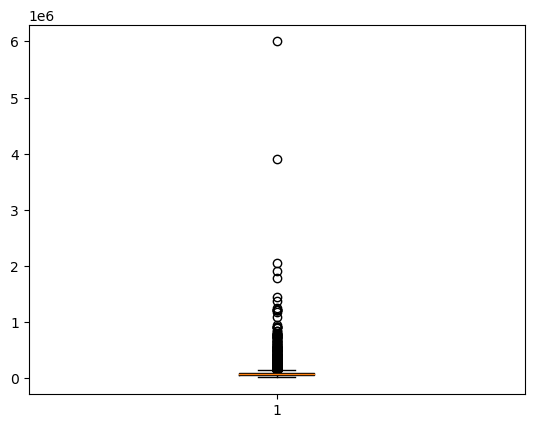

In [14]:
plt.boxplot(df.annual_inc)
plt.show()

### Looking for outliers
- The anaual income has quite a few outliers
- Need to remove the outliers
- Before that lets see 50th, 75th, 95th and 99th quantile info

In [15]:
qtl = df.annual_inc.quantile([0.5, 0.75, 0.95, 0.99])
qtl

0.50     58868.0
0.75     82000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

### Lets remove data above 95 quatile and then see the data

In [16]:
per_95_annual_inc = df['annual_inc'].quantile(0.95)
df = df[df.annual_inc <= per_95_annual_inc]

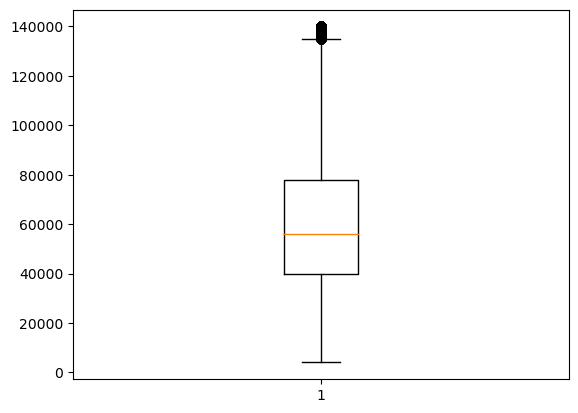

In [17]:
plt.boxplot(df.annual_inc)
plt.show()

### Now data looks good lets now check outliers in remaining of the variables

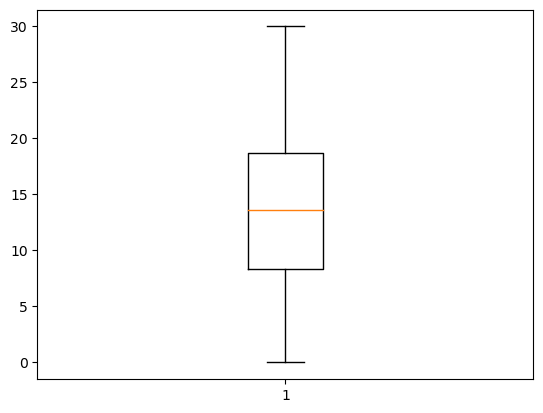

In [18]:
plt.boxplot(df.dti)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x16f3642d0>,
 'caps': [<matplotlib.lines.Line2D at 0x16f33fe90>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f3100d0>],
 'medians': [<matplotlib.lines.Line2D at 0x16f33da90>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f33f810>],
 'means': []}

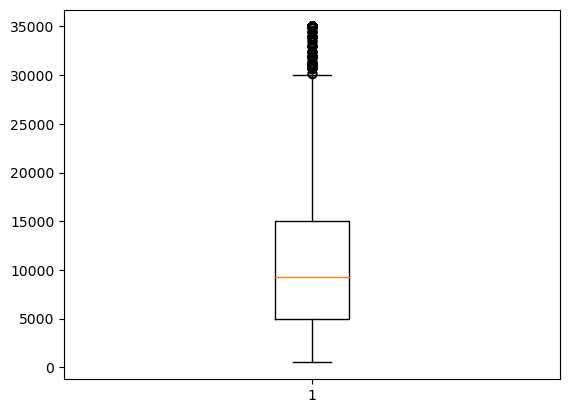

In [19]:
plt.boxplot(df.loan_amnt)

{'whiskers': [<matplotlib.lines.Line2D at 0x16e60a450>,
 'caps': [<matplotlib.lines.Line2D at 0x16e608f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x16ef96b50>],
 'medians': [<matplotlib.lines.Line2D at 0x16e61b910>],
 'fliers': [<matplotlib.lines.Line2D at 0x16e7a9250>],
 'means': []}

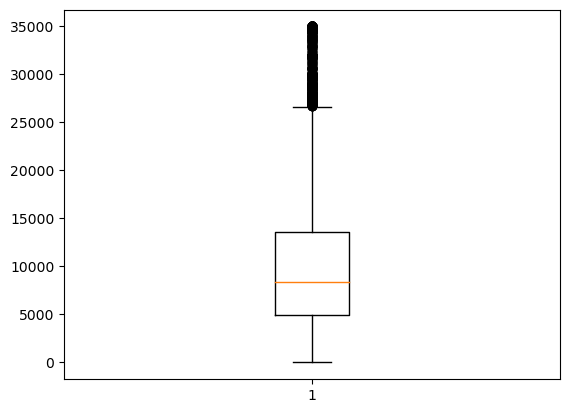

In [20]:
plt.boxplot(df.funded_amnt_inv )

The data looks good

## Visualize data
- Lets plot the graphs to visualize it
- We'll use Seaborn clounplot for this purpose.

<Axes: xlabel='loan_status', ylabel='count'>

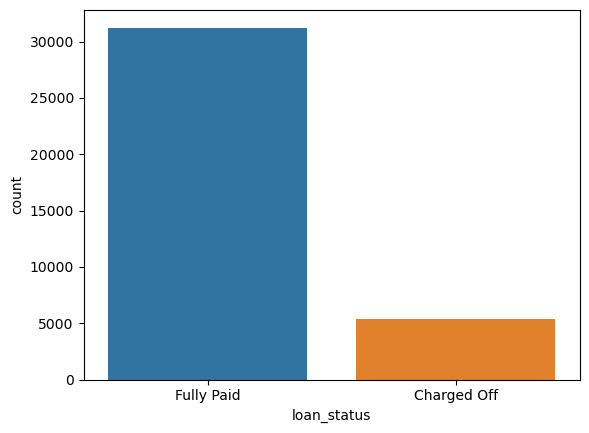

In [21]:
sns.countplot(x = 'loan_status', data = df)

<Axes: xlabel='home_ownership', ylabel='count'>

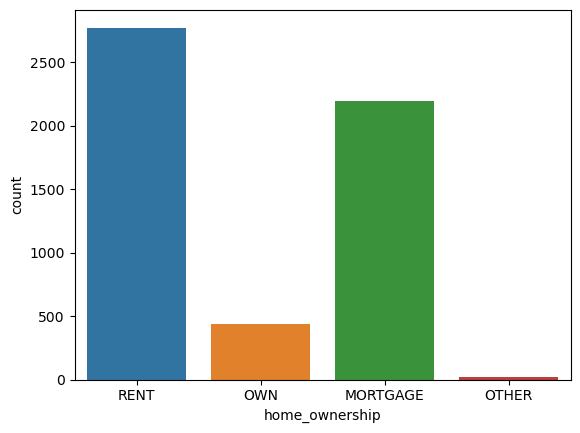

In [22]:
sns.countplot(x='home_ownership', data=df[df['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='purpose'>

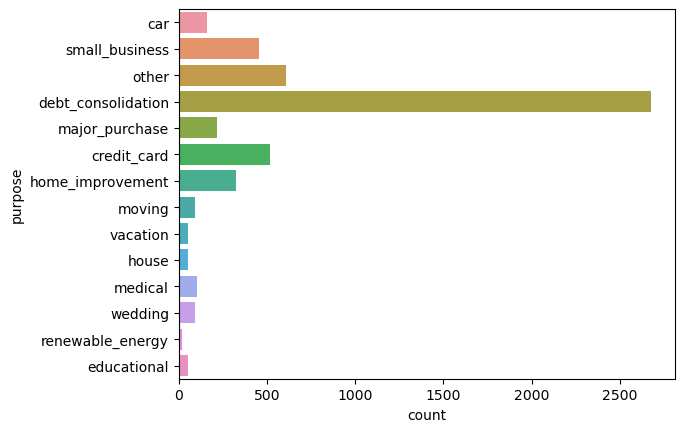

In [23]:

sns.countplot(y ='purpose', data=df[df.loan_status == 'Charged Off'])

In [24]:
#creating bins for int_rate,open_acc,total_acc
df['int_rate_groups'] = pd.cut(df['int_rate'], bins=5,precision =0,labels=['5%-10%','10%-15%','15%-17%','17%-21%','21%-24%'])
df['open_acc_groups'] = pd.cut(df['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
df['total_acc_groups'] = pd.cut(df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
df['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [25]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,int_rate_groups,open_acc_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,Verified,...,27.65,Jan-85,1,3,0,9,10%-15%,2-10,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,Source Verified,...,1.00,Apr-99,5,3,0,4,15%-17%,2-10,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,Not Verified,...,8.72,Nov-01,2,2,0,10,15%-17%,2-10,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,Source Verified,...,20.00,Feb-96,1,10,0,37,15%-17%,2-10,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,A4,RENT,36000.0,Source Verified,...,11.20,Nov-04,3,9,0,12,5%-10%,2-10,2-20,31k-58k


Text(0.5, 0, 'Interest Rate')

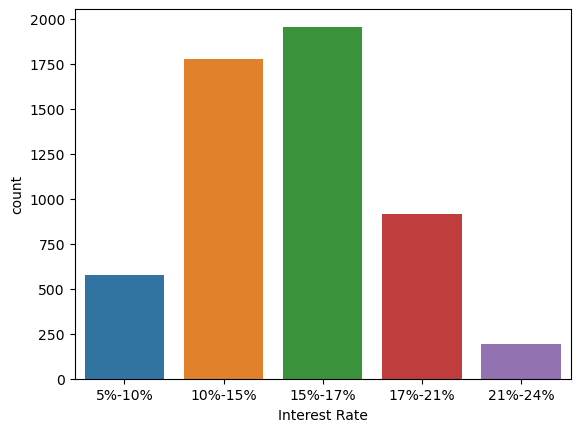

In [26]:

sns.countplot(x='int_rate_groups', data=df[df.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')


<Axes: xlabel='annual_inc_groups', ylabel='count'>

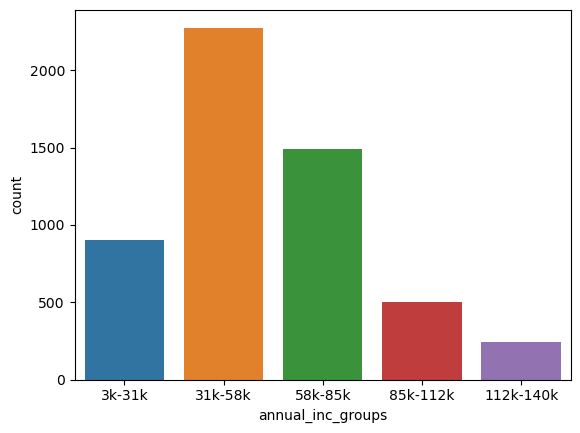

In [27]:
sns.countplot(x='annual_inc_groups', data=df[df.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

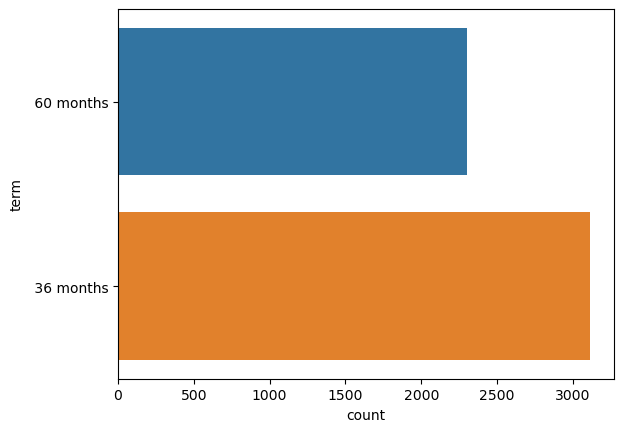

In [28]:
sns.countplot(y='term', data=df[df['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

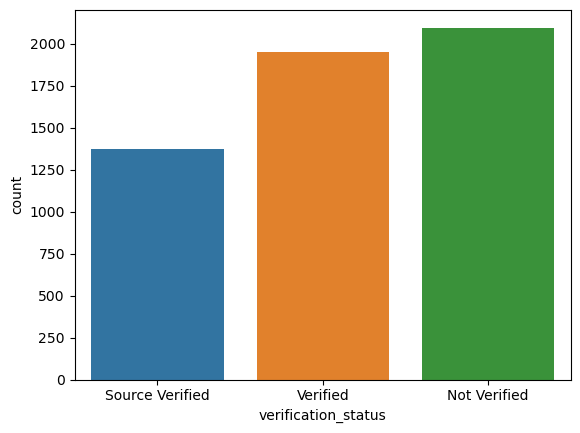

In [29]:
sns.countplot(x='verification_status', data=df[df['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

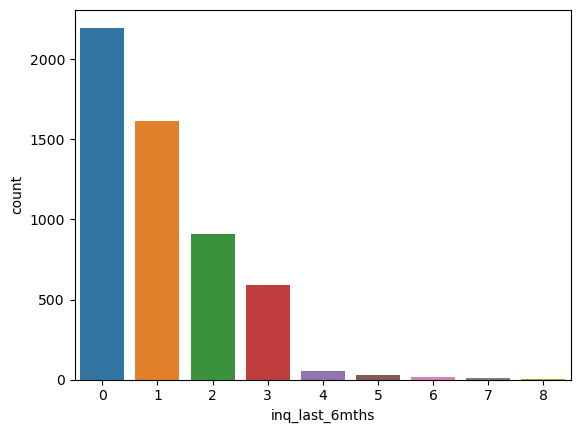

In [30]:
sns.countplot(x='inq_last_6mths', data=df[df['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

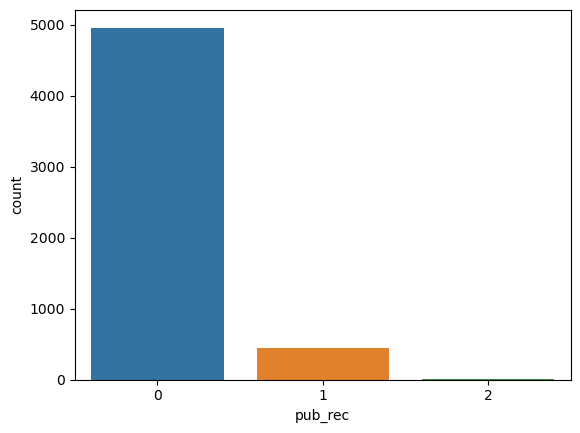

In [31]:
sns.countplot(x='pub_rec', data=df[df['loan_status']=='Charged Off'])

In [32]:
df['installment_groups'] = pd.cut(df['installment'], bins=10,precision =0,labels=['10-140','140-275','275-405','405-530','530-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
df['funded_amnt_inv_group'] = pd.cut(df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
df['loan_amnt_groups'] = pd.cut(df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df['dti_groups'] = pd.cut(df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

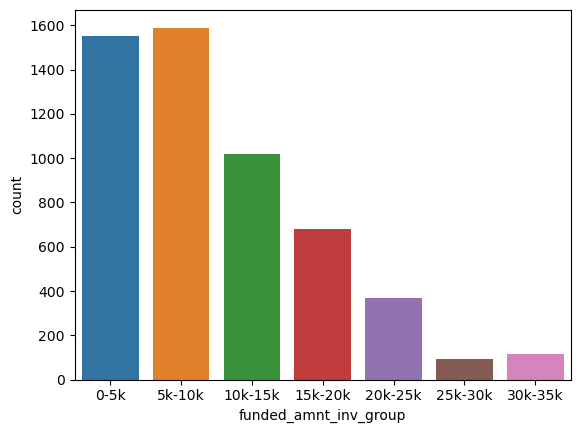

In [33]:
sns.countplot(x='funded_amnt_inv_group', data=df[df['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

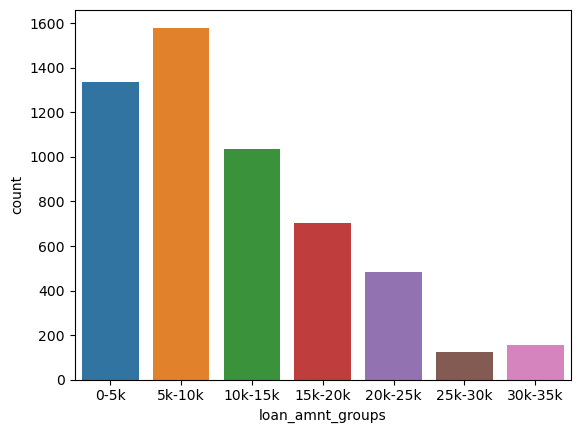

In [34]:
sns.countplot(x='loan_amnt_groups', data=df[df['loan_status']=='Charged Off'])

<Axes: xlabel='installment_groups', ylabel='count'>

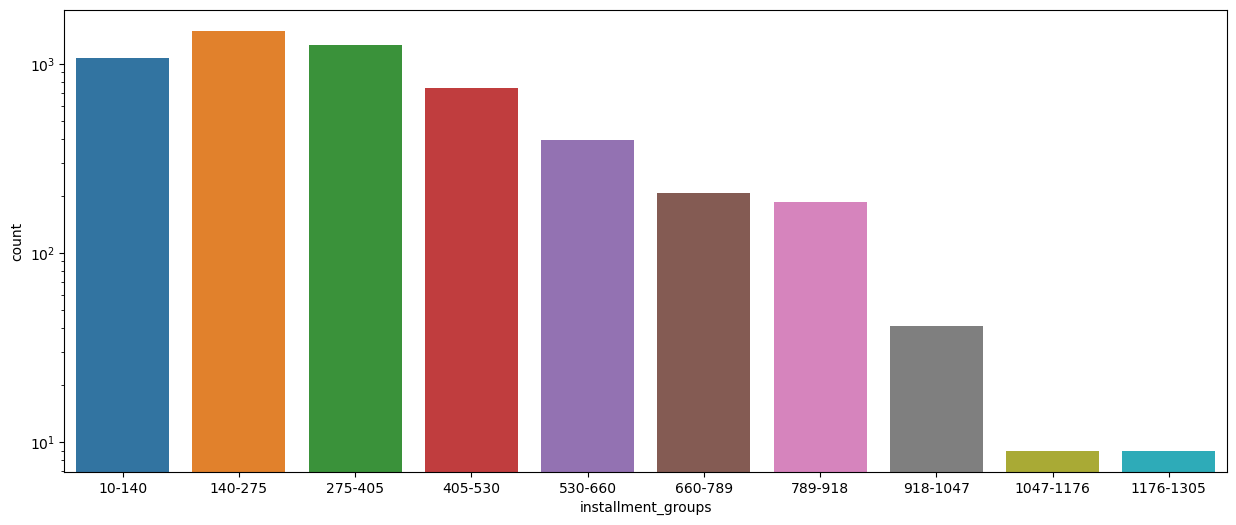

In [35]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=df[df['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

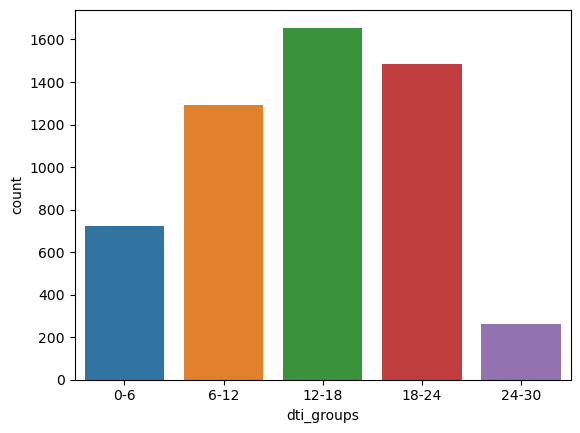

In [36]:
sns.countplot(x='dti_groups', data=df[df['loan_status']=='Charged Off'])

# Observations

### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when : 

- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts
- Applicants who receive interest at the rate of 15-17%
- Applicants who have an income of range 31k - 58k
- Applicants who have 20-37 open_acc
- Applicants with employement length of 10
- When funded amount by investor is between 5000-10000
- Loan amount is between 5k - 10k
- Dti is between 12-18
- When monthly installments are between 140-275
- Term of 36 months
- When the loan status is Not verified
- When the no of enquiries in last 6 months is 0
- When the number of derogatory public records is 0
- When the purpose is 'debt_consolidation'


## Identifying some more co-relations

#### 1.Loan Amount vs purpose

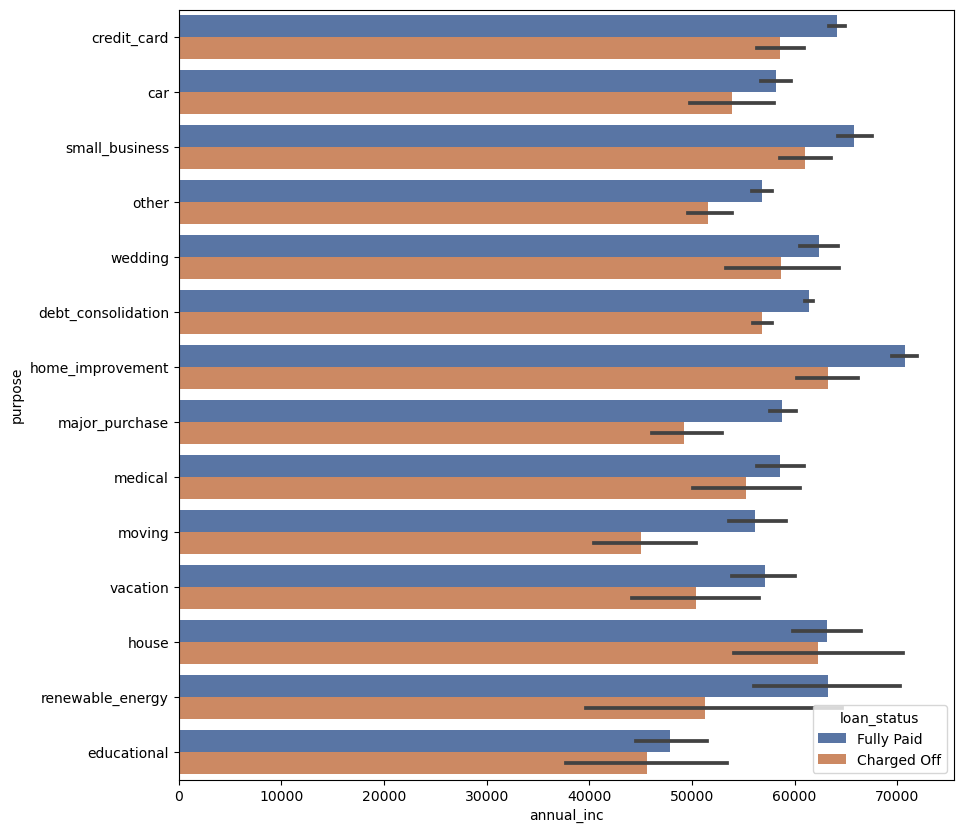

In [37]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

#### Home ownership vs annaual income

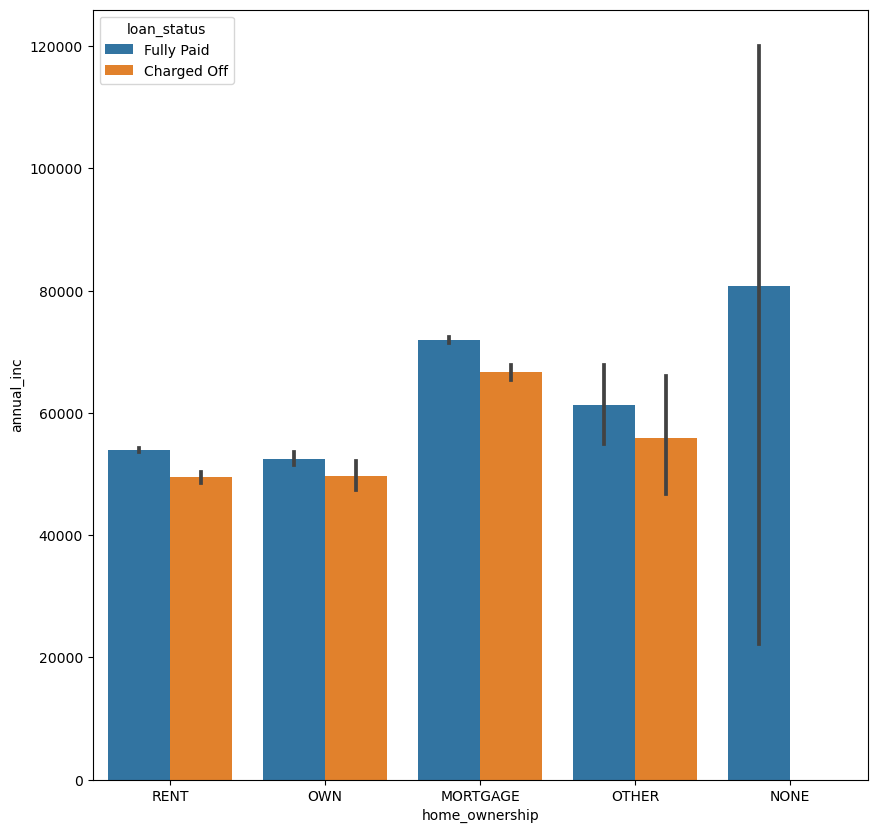

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='home_ownership', y='annual_inc', hue ='loan_status')
plt.show()

#### annual income vs interest rate groups

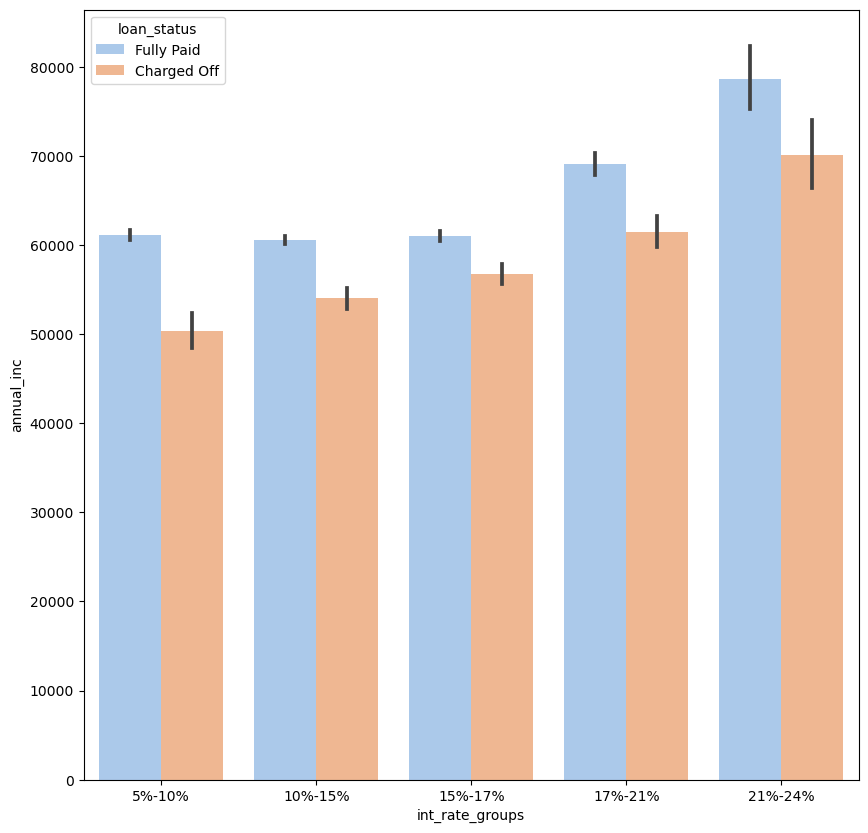

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### Loan amount vs Purpose

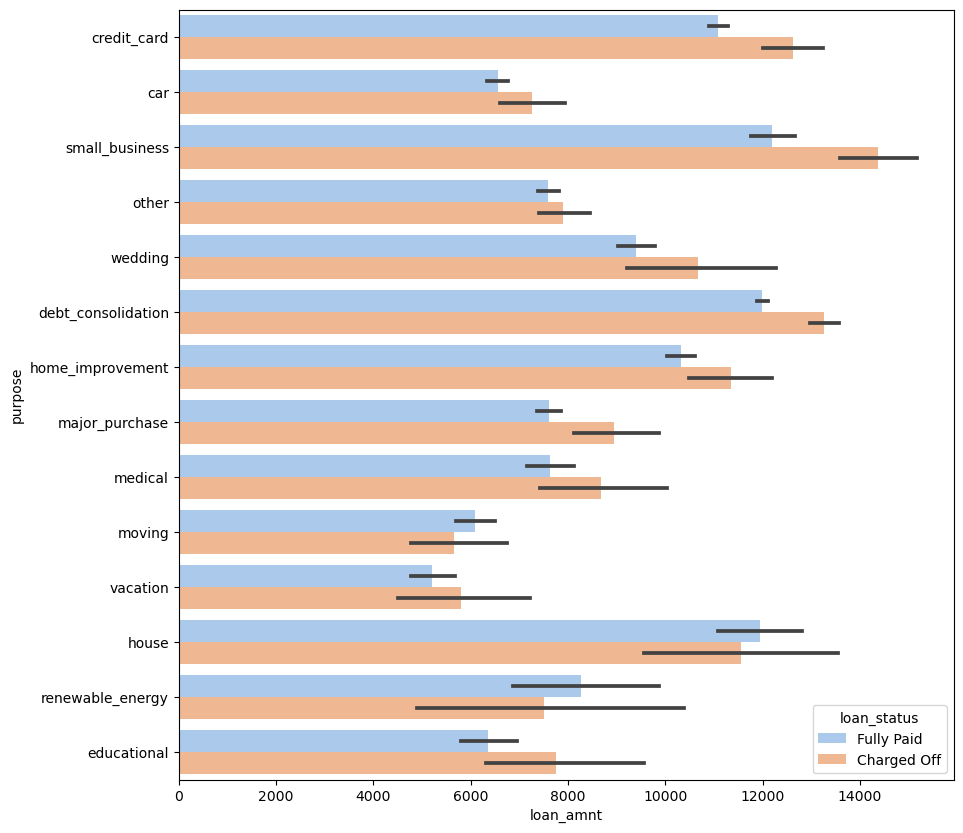

In [41]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### Loan Amount vs home ownership

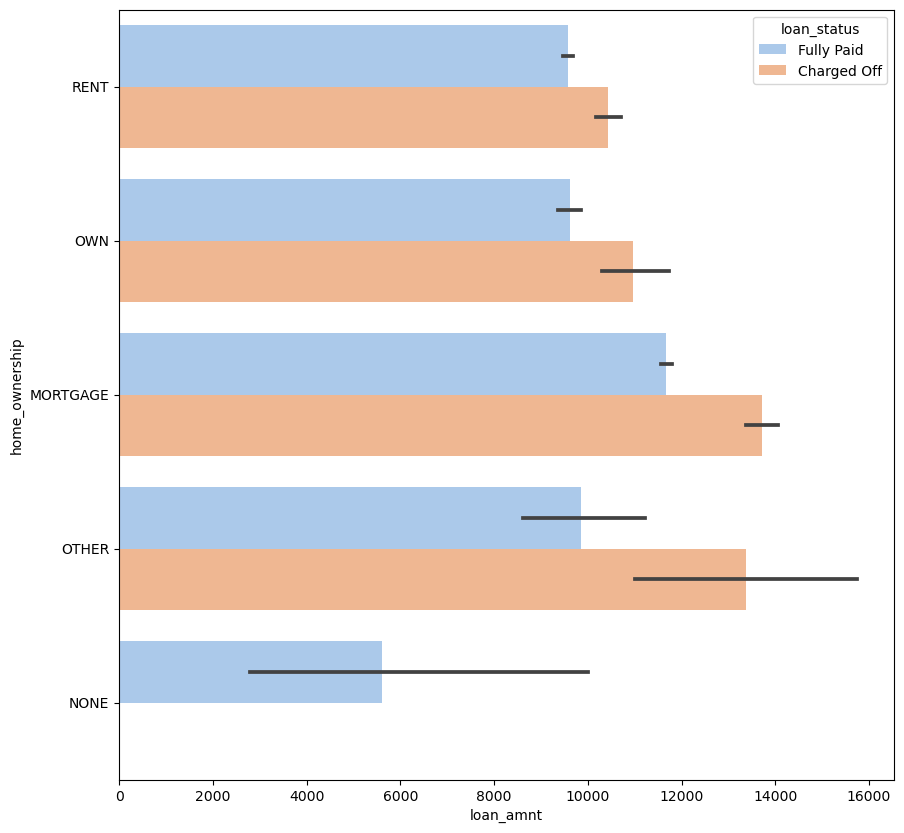

In [42]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

# Observations

### So we can coclude as per above  respect to the charged off loans. There is a more probability of defaulting when : 

- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
- When the loan is verified and loan amount is above 16k
